In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from os import path
import matplotlib.ticker as ticker
from scipy import stats
from sklearn.linear_model import LinearRegression

labels = ["paiceHusk", "krovetz", "sStripping", "porter2", "lovins", "wikt", "none"]
maxLengths = [20, 55, 148, 403, 1097, 2981, 2000000]
collection_n_values = [64, 32, 16, 8, 4, 2, 1]
collection_sizes = [817857, 1635715, 3271430, 6542860, 13085721, 26171443, 52342886]

home_dir = "/home/katelyn/Documents/COSC490/Stemming"
data_dir_clueweb = path.join(home_dir, "Data/clueweb")
data_dir_wikt = path.join(home_dir, "Data/wikt")

MARKERS = ["o","^","s","*","d", "P", "X"]
markers = itertools.cycle(MARKERS)

### Preparing Data

In [14]:
df_list = list()

for n, l in zip(collection_n_values, maxLengths):
   df = pd.read_csv(path.join(data_dir_clueweb,f"combined/ndcg_{l}-{n}"), sep=" ")
   df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

data_avg = data[data["qid"] == "amean"]
data = data.drop(data[data["qid"] == "amean"].index)

### Document Length

In [16]:
target_data = data_avg

best_nDCG = list()
for length in np.unique(target_data["maxLength"]):
    selected_data = data_avg[data_avg["maxLength"] == length]
    best_nDCG.append(selected_data["ndcg"].max())

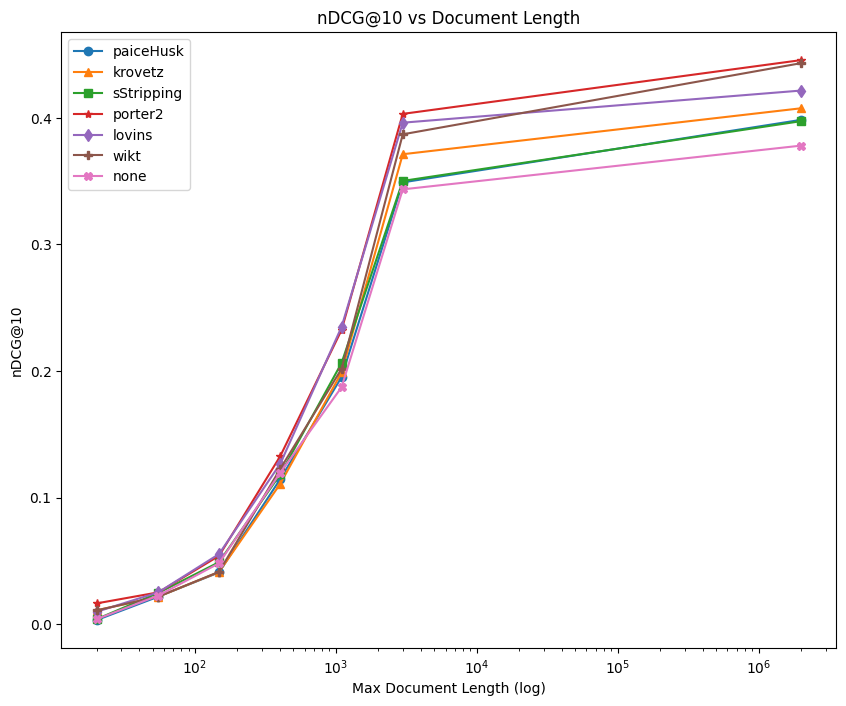

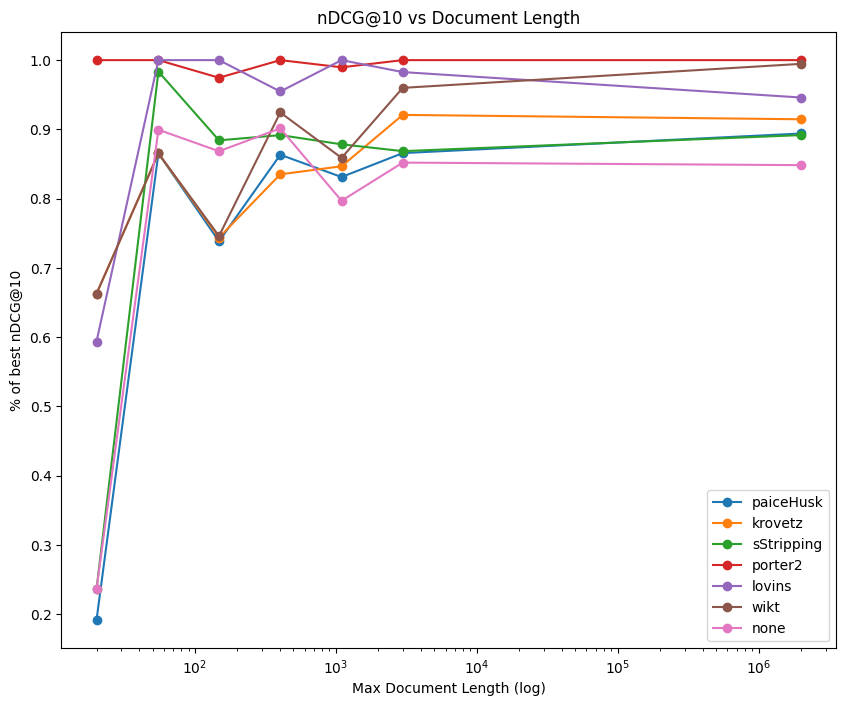

In [17]:
plt.figure(figsize=(10,8))
for stemmer in labels:
    stemmer_data = target_data[target_data["stemmer"] == stemmer]
    plt.plot(stemmer_data["maxLength"], stemmer_data["ndcg"], marker=next(markers), label=stemmer)
    plt.xscale("log")

plt.title("nDCG@10 vs Document Length")
plt.xlabel("Max Document Length (log)")
plt.ylabel("nDCG@10")
plt.legend()
plt.show()

# ----------------------------------------------------------------------

plt.figure(figsize=(10,8))
for stemmer in labels:
    stemmer_data = target_data[target_data["stemmer"] == stemmer]
    stemmer_values = np.array(stemmer_data["ndcg"])/best_nDCG
    plt.plot(stemmer_data["maxLength"], stemmer_values, "o-", label=stemmer)
    plt.xscale("log")
plt.title("nDCG@10 vs Document Length")
plt.xlabel("Max Document Length (log)")
plt.ylabel("% of best nDCG@10")
plt.legend()
plt.show()

### Collection Size

In [18]:
best_nDCG = list()
for size in collection_sizes:
    selected_data = data_avg[data_avg["collectionSize"] == size]
    best_nDCG.append(selected_data["ndcg"].max())

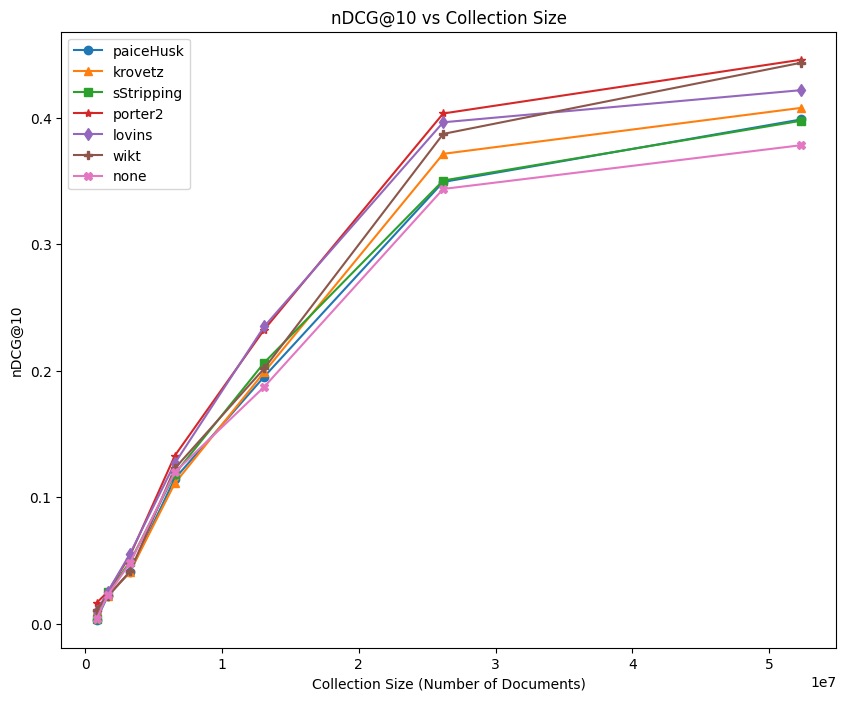

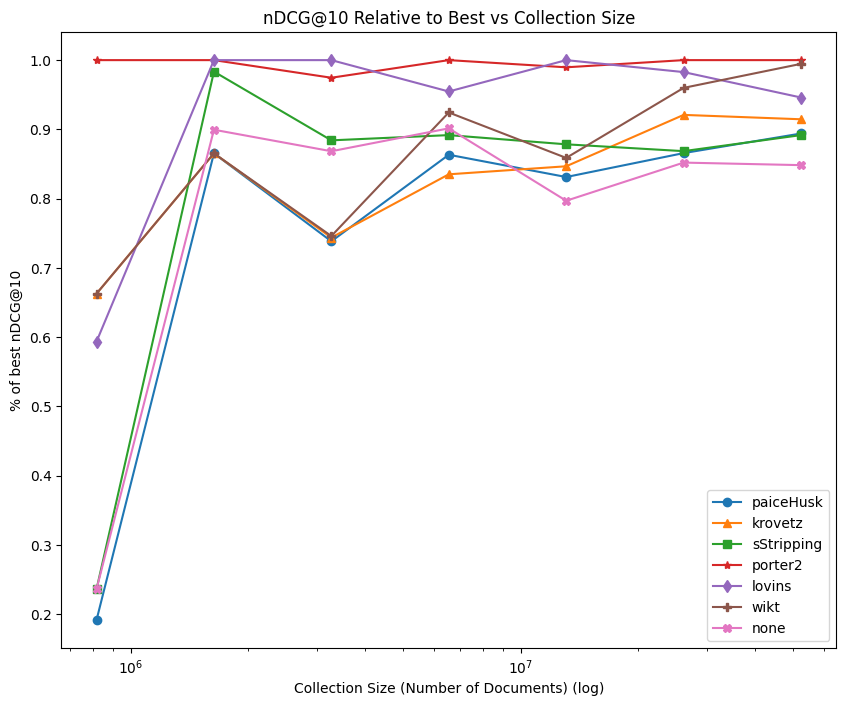

In [19]:
plt.figure(figsize=(10,8))
for stemmer in labels:
    stemmer_data = data_avg[data_avg["stemmer"] == stemmer]
    plt.plot(stemmer_data["collectionSize"], stemmer_data["ndcg"], marker=next(markers), label=stemmer)

plt.title("nDCG@10 vs Collection Size")
plt.xlabel("Collection Size (Number of Documents)")
plt.ylabel("nDCG@10")
plt.legend()

# ----------------------------------------------------------------------

plt.figure(figsize=(10,8))
for stemmer in labels:
    stemmer_data = data_avg[data_avg["stemmer"] == stemmer]
    stemmer_values = np.array(stemmer_data["ndcg"])/best_nDCG
    plt.plot(stemmer_data["collectionSize"], stemmer_values, marker=next(markers), label=stemmer)
    plt.xscale("log")

plt.title("nDCG@10 Relative to Best vs Collection Size")
plt.xlabel("Collection Size (Number of Documents) (log)")
plt.ylabel("% of best nDCG@10")
plt.legend()

### Statistical Significance